# Data Surfers: Cap. 1–3 — Mini‑notebook

**Objetivo (15–25 min):** conocer IPython/Jupyter, repasar estructuras básicas, funciones y manejo de archivos, y hacer una mini‑exploración de datos.

> Basado en McKinney (Cap. 1–3).

## 1) IPython y Jupyter: tips rápidos
- Ejecutá celdas con **Shift+Enter**
- Magics útiles: `%pwd`, `%timeit`, `%run script.py`
- Shell escapes:  
  - **Mac/Linux**: `!ls`, `!echo Hola`  
  - **Windows**: `!dir`, `!echo Hola`


In [20]:
%pwd

'/Users/alankalbermatter/Workspace/Facultad/data-science/cd2025/proyectos/lab1/data_surfers'

In [21]:
%timeit sum(range(100000))

747 µs ± 38.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2) Python básico (valores, colecciones)

In [22]:
nombre = 'Juan'
edad = 25
es_estudiante = True
notas = [7, 10, 6, 9, 8]
unicos = set([1,1,2,3,3])
tupla = ("A", "B")
persona = {"nombre": nombre, "edad": edad}
print(persona)
print('Promedio:', sum(notas)/len(notas))
unicos

{'nombre': 'Juan', 'edad': 25}
Promedio: 8.0


{1, 2, 3}

### Comprensiones y slicing

In [23]:
cuadrados = [x*x for x in range(10)]                  #calcula el cuadrado de cada numero de 0 a 9
ultimos_tres = notas[-3:]                             #slicing
pares = [x for x in range(20) if x % 2 == 0]
cuadrados, ultimos_tres, pares[:5]

([0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [6, 9, 8], [0, 2, 4, 6, 8])

## 3) Funciones 

In [24]:
# Definimos una función que recibe una lista de números
def mayores_que_media(numeros):
    media = sum(numeros) / len(numeros)
   
    return [x for x in numeros if x > media]  # Comprensión de lista

# Lista de ejemplo
datos = [2, 5, 9, 3, 8]

media = sum(datos) / len(datos)

print("Datos:", datos)
print("Media:", media)
print("Mayores que la media:", mayores_que_media(datos))


Datos: [2, 5, 9, 3, 8]
Media: 5.4
Mayores que la media: [9, 8]


## 4) Archivos: lectura/escritura segura con `with`

In [25]:
ruta = 'ejemplo.txt'
with open(ruta, 'w', encoding='utf-8') as f:
    f.write('Hola, archivo!\nLínea 2')
with open(ruta, encoding='utf-8') as f:
    contenido = f.read()
contenido

'Hola, archivo!\nLínea 2'

## 5) Mini‑EDA con CSV (sin pandas)
Usaremos el archivo `ventas.csv` generado para este taller.


In [42]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import csv, statistics
from collections import defaultdict
ventas = []
with open('ventas.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        row['cantidad'] = int(row['cantidad'])
        row['precio_unitario'] = float(row['precio_unitario'])
        ventas.append(row)
len(ventas), ventas[0]

(791,
 {'fecha': '2025-01-01',
  'producto': 'AquaBotella',
  'cantidad': 1,
  'precio_unitario': 2499.0})

In [27]:
# Funciones auxiliares para limpiar datos de Adidas
def limpiar_moneda(valor):
    """Convierte string de moneda a float, maneja valores vacíos"""
    if isinstance(valor, str):
        valor = valor.strip()  # Eliminar espacios
        if valor == '' or valor == 'N/A':  # Manejar valores vacíos
            return 0.0
        return float(valor.replace('$', '').replace(',', ''))
    return float(valor) if valor is not None else 0.0

def limpiar_numero(valor):
    """Convierte string numérico a int, maneja valores vacíos"""
    if isinstance(valor, str):
        valor = valor.strip()  # Eliminar espacios
        if valor == '' or valor == 'N/A':  # Manejar valores vacíos
            return 0
        return int(valor.replace(',', ''))
    return int(valor) if valor is not None else 0

# Función para calcular precio por unidad cuando falta
def calcular_precio_por_unidad(total_sales, units_sold):
    """Calcula precio por unidad cuando el dato está faltante"""
    if units_sold > 0:
        return total_sales / units_sold
    return 0.0

In [28]:
# Cargar datos de Adidas, source: Kaggle
# https://www.kaggle.com/datasets/ahmedabbas757/dataset?resource=download
import csv

ventas = []
errores_procesamiento = 0
precios_calculados = 0

with open('adidas_sales_kaggle.csv', encoding='utf-8-sig') as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            # Limpiar y convertir los datos
            row['Units Sold'] = limpiar_numero(row['Units Sold'])
            row['Total Sales'] = limpiar_numero(row['Total Sales'])
            row['Operating Profit'] = limpiar_moneda(row['Operating Profit'])
            
            # Manejar precio por unidad faltante
            precio_original = row['Price per Unit']
            if precio_original.strip() == '' or precio_original.strip() == 'N/A':
                # Calcular precio por unidad basado en total sales y units sold
                row['Price per Unit'] = calcular_precio_por_unidad(row['Total Sales'], row['Units Sold'])
                precios_calculados += 1
            else:
                row['Price per Unit'] = limpiar_moneda(precio_original)
            
            ventas.append(row)
            
        except Exception as e:
            errores_procesamiento += 1
            print(f"⚠️ Error en fila {errores_procesamiento}: {e}")
            # Mostrar solo los primeros 3 errores para no saturar la salida
            if errores_procesamiento <= 3:
                print(f"   Datos problemáticos: {row}")
            continue

print(f"✅ DATOS PROCESADOS:")
print(f"  • Cargadas: {len(ventas):,} transacciones de ventas Adidas")
print(f"  • Errores procesados: {errores_procesamiento}")
print(f"  • Precios calculados automáticamente: {precios_calculados}")

print(f"\n📋 Ejemplo de registro procesado:")
print(f"  Retailer: {ventas[0]['Retailer']}")
print(f"  Product: {ventas[0]['Product']}")
print(f"  Total Sales: ${ventas[0]['Total Sales']:,}")
print(f"  Units Sold: {ventas[0]['Units Sold']}")
print(f"  Price per Unit: ${ventas[0]['Price per Unit']:.2f}")
print(f"  Operating Profit: ${ventas[0]['Operating Profit']:,}")
print(f"  Sales Method: {ventas[0]['Sales Method']}")
print(f"  Region: {ventas[0]['Region']}")

✅ DATOS PROCESADOS:
  • Cargadas: 9,641 transacciones de ventas Adidas
  • Errores procesados: 0
  • Precios calculados automáticamente: 2

📋 Ejemplo de registro procesado:
  Retailer: Walmart
  Product: Women's Apparel
  Total Sales: $2,245
  Units Sold: 218
  Price per Unit: $103.00
  Operating Profit: $1,257.0
  Sales Method: Online
  Region: Southeast


In [29]:
# Análisis con datos de Adidas
from collections import Counter

# Análisis por producto y por retailer
conteo_productos = Counter(v['Product'] for v in ventas)
conteo_retailers = Counter(v['Retailer'] for v in ventas)

# Recaudación por producto
recaudacion_producto = defaultdict(float)
for v in ventas:
    recaudacion_producto[v['Product']] += v['Total Sales']

print("🏪 Top 5 retailers por número de transacciones:")
for retailer, count in conteo_retailers.most_common(5):
    print(f"  {retailer}: {count:,} transacciones")

print(f"\n📦 Top 5 productos por número de transacciones:")
for producto, count in conteo_productos.most_common(5):
    print(f"  {producto}: {count:,} transacciones")

print(f"\n💰 Recaudación total por producto (top 5):")
top_productos = sorted(recaudacion_producto.items(), key=lambda x: x[1], reverse=True)[:5]
for producto, ventas_total in top_productos:
    print(f"  {producto}: ${ventas_total:,}")
    
# Guardar top 3 para usar en gráficos
top3 = top_productos[:3]
print(f"\n🏆 TOP 3 para gráficos: {top3}")

🏪 Top 5 retailers por número de transacciones:
  Foot Locker: 2,634 transacciones
  West Gear: 2,372 transacciones
  Sports Direct: 2,030 transacciones
  Kohl's: 1,030 transacciones
  Amazon: 949 transacciones

📦 Top 5 productos por número de transacciones:
  Men's Street Footwear: 1,610 transacciones
  Men's Athletic Footwear: 1,608 transacciones
  Women's Apparel: 1,607 transacciones
  Women's Street Footwear: 1,606 transacciones
  Women's Athletic Footwear: 1,605 transacciones

💰 Recaudación total por producto (top 5):
  Men's Street Footwear: $20,882,669.0
  Women's Apparel: $17,847,910.0
  Men's Athletic Footwear: $15,322,410.0
  Women's Street Footwear: $12,770,688.0
  Men's Apparel: $12,283,155.0

🏆 TOP 3 para gráficos: [("Men's Street Footwear", 20882669.0), ("Women's Apparel", 17847910.0), ("Men's Athletic Footwear", 15322410.0)]


In [30]:
from collections import Counter, defaultdict
# Ventas por producto y recaudación (datos Adidas)
conteo = Counter(v['Product'] for v in ventas)
recaudacion = defaultdict(float)
for v in ventas:
    recaudacion[v['Product']] += v['Total Sales']
conteo, dict(recaudacion)

(Counter({"Men's Street Footwear": 1610,
          "Men's Athletic Footwear": 1608,
          "Women's Apparel": 1607,
          "Women's Street Footwear": 1606,
          "Women's Athletic Footwear": 1605,
          "Men's Apparel": 1604,
          "Men's aparel": 1}),
 {"Women's Apparel": 17847910.0,
  "Men's Street Footwear": 20882669.0,
  "Women's Street Footwear": 12770688.0,
  "Men's Athletic Footwear": 15322410.0,
  "Women's Athletic Footwear": 10659235.0,
  "Men's Apparel": 12283155.0,
  "Men's aparel": 54000.0})

In [31]:
# Ventas por producto y recaudación usando datos de Adidas
from collections import Counter, defaultdict

print("🔍 Análisis manual con Counter (datos Adidas):")
conteo_adidas = Counter(v['Product'] for v in ventas)
recaudacion_adidas = defaultdict(float)
for v in ventas:
    recaudacion_adidas[v['Product']] += v['Total Sales']

print("Conteo por productos:")
for producto, cantidad in conteo_adidas.most_common(5):
    print(f"  {producto}: {cantidad:,} transacciones")

print(f"\nRecaudación por producto (top 5):")
top_recaudacion = sorted(recaudacion_adidas.items(), key=lambda x: x[1], reverse=True)[:5]
for producto, total in top_recaudacion:
    print(f"  {producto}: ${total:,.0f}")

# Resultado original para comparar
conteo_adidas, dict(recaudacion_adidas)

🔍 Análisis manual con Counter (datos Adidas):
Conteo por productos:
  Men's Street Footwear: 1,610 transacciones
  Men's Athletic Footwear: 1,608 transacciones
  Women's Apparel: 1,607 transacciones
  Women's Street Footwear: 1,606 transacciones
  Women's Athletic Footwear: 1,605 transacciones

Recaudación por producto (top 5):
  Men's Street Footwear: $20,882,669
  Women's Apparel: $17,847,910
  Men's Athletic Footwear: $15,322,410
  Women's Street Footwear: $12,770,688
  Men's Apparel: $12,283,155


(Counter({"Men's Street Footwear": 1610,
          "Men's Athletic Footwear": 1608,
          "Women's Apparel": 1607,
          "Women's Street Footwear": 1606,
          "Women's Athletic Footwear": 1605,
          "Men's Apparel": 1604,
          "Men's aparel": 1}),
 {"Women's Apparel": 17847910.0,
  "Men's Street Footwear": 20882669.0,
  "Women's Street Footwear": 12770688.0,
  "Men's Athletic Footwear": 15322410.0,
  "Women's Athletic Footwear": 10659235.0,
  "Men's Apparel": 12283155.0,
  "Men's aparel": 54000.0})

In [32]:
# Top 3 productos por recaudación
top3 = sorted(recaudacion.items(), key=lambda x: x[1], reverse=True)[:3]
top3

[("Men's Street Footwear", 20882669.0),
 ("Women's Apparel", 17847910.0),
 ("Men's Athletic Footwear", 15322410.0)]

### Gráfico rápido con matplotlib

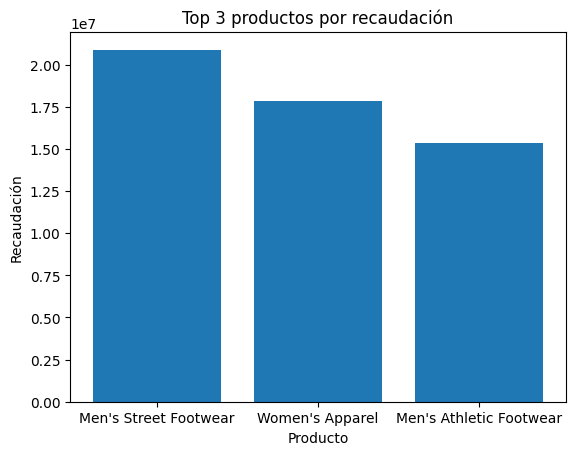

In [33]:
import matplotlib.pyplot as plt
labels = [k for k,_ in top3]
vals = [v for _,v in top3]
plt.figure()
plt.bar(labels, vals)
plt.title('Top 3 productos por recaudación')
plt.xlabel('Producto'); plt.ylabel('Recaudación')
plt.show()

> **Checklist aprendido**: IPython/Jupyter, colecciones, funciones, archivos, y pequeña EDA.


## 6) NumPy: Arrays y operaciones vectorizadas

NumPy es la base de la computación científica en Python. Nos permite trabajar con arrays multidimensionales de forma eficiente.

In [34]:
import numpy as np

# Crear arrays de diferentes formas
arr1 = np.array([1, 2, 3, 4, 5])                    # desde lista
arr2 = np.arange(0, 10, 2)                          # rango con paso
arr3 = np.linspace(0, 1, 5)                         # 5 números entre 0 y 1
arr4 = np.zeros(5)                                   # array de ceros
arr5 = np.ones((2, 3))                              # matriz 2x3 de unos

print("Array desde lista:", arr1)
print("Array con arange:", arr2)
print("Array con linspace:", arr3)
print("Array de ceros:", arr4)
print("Matriz de unos:\n", arr5)

Array desde lista: [1 2 3 4 5]
Array con arange: [0 2 4 6 8]
Array con linspace: [0.   0.25 0.5  0.75 1.  ]
Array de ceros: [0. 0. 0. 0. 0.]
Matriz de unos:
 [[1. 1. 1.]
 [1. 1. 1.]]


In [35]:
# Operaciones vectorizadas (mucho más rápidas que loops)
numeros = np.array([1, 2, 3, 4, 5])
cuadrados_np = numeros ** 2                         # elevar al cuadrado
raices = np.sqrt(numeros)                           # raíz cuadrada
senos = np.sin(numeros)                             # función seno

print("Números originales:", numeros)
print("Cuadrados:", cuadrados_np)
print("Raíces cuadradas:", raices)
print("Senos:", senos)

# Estadísticas rápidas
datos = np.random.normal(10, 2, 100)                # 100 números normales (media=10, std=2)
print(f"\nEstadísticas de {len(datos)} números aleatorios:")
print(f"Media: {np.mean(datos):.2f}")
print(f"Mediana: {np.median(datos):.2f}")
print(f"Desviación estándar: {np.std(datos):.2f}")
print(f"Mínimo: {np.min(datos):.2f}, Máximo: {np.max(datos):.2f}")

Números originales: [1 2 3 4 5]
Cuadrados: [ 1  4  9 16 25]
Raíces cuadradas: [1.         1.41421356 1.73205081 2.         2.23606798]
Senos: [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]

Estadísticas de 100 números aleatorios:
Media: 9.88
Mediana: 9.46
Desviación estándar: 1.99
Mínimo: 6.11, Máximo: 14.36


In [36]:
# Trabajando con matrices 2D
matriz = np.random.randint(1, 10, (4, 5))           # matriz 4x5 con enteros aleatorios 1-9
print("Matriz original:")
print(matriz)
print(f"Forma: {matriz.shape}")

# Indexing y slicing avanzado
print(f"\nElemento [1,2]: {matriz[1, 2]}")
print(f"Primera fila: {matriz[0, :]}")
print(f"Segunda columna: {matriz[:, 1]}")
print(f"Submatriz 2x2:\n{matriz[:2, :2]}")

# Operaciones útiles
print(f"\nSuma total: {np.sum(matriz)}")
print(f"Suma por filas: {np.sum(matriz, axis=1)}")
print(f"Suma por columnas: {np.sum(matriz, axis=0)}")
print(f"Elemento máximo: {np.max(matriz)}")
print(f"Posición del máximo: {np.unravel_index(np.argmax(matriz), matriz.shape)}")

Matriz original:
[[6 8 9 3 9]
 [2 1 7 4 6]
 [8 5 1 2 5]
 [5 4 3 9 4]]
Forma: (4, 5)

Elemento [1,2]: 7
Primera fila: [6 8 9 3 9]
Segunda columna: [8 1 5 4]
Submatriz 2x2:
[[6 8]
 [2 1]]

Suma total: 101
Suma por filas: [35 20 21 25]
Suma por columnas: [21 18 20 18 24]
Elemento máximo: 9
Posición del máximo: (np.int64(0), np.int64(2))


In [39]:
# Alias para consistencia en análisis NumPy
ventas_adidas = ventas

In [40]:
# Ejemplo práctico: análisis de ventas Adidas con NumPy
# Convertir nuestros datos de ventas a arrays de NumPy para análisis más eficiente

# Extraer diferentes métricas como arrays
unidades_vendidas = np.array([v['Units Sold'] for v in ventas_adidas])
precios_unitarios = np.array([v['Price per Unit'] for v in ventas_adidas])
ventas_totales = np.array([v['Total Sales'] for v in ventas_adidas])
ganancias = np.array([v['Operating Profit'] for v in ventas_adidas])

print("📊 Análisis de ventas Adidas con NumPy:")
print(f"Total de transacciones: {len(ventas_adidas):,}")
print(f"Unidades vendidas promedio: {np.mean(unidades_vendidas):.0f}")
print(f"Precio unitario promedio: ${np.mean(precios_unitarios):.2f}")
print(f"Venta promedio por transacción: ${np.mean(ventas_totales):,.2f}")
print(f"Ganancia promedio por transacción: ${np.mean(ganancias):,.2f}")

# Verificar problemas en los datos
print(f"\n🔍 Diagnóstico de calidad de datos:")
print(f"Ventas con valor 0: {np.sum(ventas_totales == 0):,}")
print(f"Ganancias con valor 0: {np.sum(ganancias == 0):,}")
print(f"Precios con valor 0: {np.sum(precios_unitarios == 0):,}")
print(f"Valores NaN en ventas: {np.sum(np.isnan(ventas_totales)):,}")
print(f"Valores NaN en ganancias: {np.sum(np.isnan(ganancias)):,}")

# Percentiles útiles para entender la distribución
print(f"\n📈 Distribución de ventas por transacción:")
percentiles_ventas = np.percentile(ventas_totales, [25, 50, 75, 90, 95])
print(f"P25: ${percentiles_ventas[0]:,.0f}")
print(f"P50 (mediana): ${percentiles_ventas[1]:,.0f}")
print(f"P75: ${percentiles_ventas[2]:,.0f}")
print(f"P90: ${percentiles_ventas[3]:,.0f}")
print(f"P95: ${percentiles_ventas[4]:,.0f}")

# Análisis de eficiencia: margen de ganancia (CORREGIDO)
print(f"\n💰 Análisis de rentabilidad (con manejo de errores):")

# Filtrar datos válidos (ventas > 0 para evitar división por cero)
datos_validos = ventas_totales > 0
ventas_validas = ventas_totales[datos_validos]
ganancias_validas = ganancias[datos_validos]

if len(ventas_validas) > 0:
    margen_ganancia = (ganancias_validas / ventas_validas) * 100  # operación vectorizada segura
    print(f"Datos válidos para análisis de rentabilidad: {len(ventas_validas):,} de {len(ventas_totales):,}")
    print(f"Margen de ganancia promedio: {np.mean(margen_ganancia):.1f}%")
    print(f"Margen de ganancia mediano: {np.median(margen_ganancia):.1f}%")
    
    # Transacciones más rentables (top 10%)
    if len(margen_ganancia) > 0:
        percentil_90 = np.percentile(margen_ganancia, 90)
        indices_top_rentabilidad = margen_ganancia > percentil_90
        ventas_top_rentabilidad = ventas_validas[indices_top_rentabilidad]
        print(f"Transacciones en top 10% rentabilidad: {len(ventas_top_rentabilidad):,}")
        if len(ventas_top_rentabilidad) > 0:
            print(f"Venta promedio del top 10% más rentable: ${np.mean(ventas_top_rentabilidad):,.2f}")
            print(f"Margen promedio del top 10%: {np.mean(margen_ganancia[indices_top_rentabilidad]):.1f}%")
else:
    print("⚠️ No hay datos válidos para análisis de rentabilidad")

# Análisis adicional: distribución de márgenes
if 'margen_ganancia' in locals() and len(margen_ganancia) > 0:
    print(f"\n📊 Distribución de márgenes de ganancia:")
    print(f"Margen mínimo: {np.min(margen_ganancia):.1f}%")
    print(f"Margen máximo: {np.max(margen_ganancia):.1f}%")
    print(f"Transacciones con margen negativo: {np.sum(margen_ganancia < 0):,}")

📊 Análisis de ventas Adidas con NumPy:
Total de transacciones: 9,641
Unidades vendidas promedio: 257
Precio unitario promedio: $45.21
Venta promedio por transacción: $9,316.47
Ganancia promedio por transacción: $3,439.28

🔍 Diagnóstico de calidad de datos:
Ventas con valor 0: 4
Ganancias con valor 0: 4
Precios con valor 0: 0
Valores NaN en ventas: 0
Valores NaN en ganancias: 0

📈 Distribución de ventas por transacción:
P25: $425
P50 (mediana): $957
P75: $15,000
P90: $30,000
P95: $40,625

💰 Análisis de rentabilidad (con manejo de errores):
Datos válidos para análisis de rentabilidad: 9,637 de 9,641
Margen de ganancia promedio: 42.3%
Margen de ganancia mediano: 41.0%
Transacciones en top 10% rentabilidad: 964
Venta promedio del top 10% más rentable: $3,846.44
Margen promedio del top 10%: 60.1%

📊 Distribución de márgenes de ganancia:
Margen mínimo: 10.0%
Margen máximo: 80.0%
Transacciones con margen negativo: 0


## 7) Pandas: DataFrames para análisis de datos

Pandas nos permite trabajar con datos tabulares de forma más intuitiva y poderosa. Ahora usaremos los datos reales de ventas de Adidas.

In [44]:
import pandas as pd

# Crear DataFrame desde nuestros datos de ventas de Adidas
df_adidas = pd.DataFrame(ventas_adidas)

# Exploración básica
print("📊 Información básica del DataFrame de Adidas:")
print(f"Forma: {df_adidas.shape} (filas, columnas)")
print(f"Columnas: {list(df_adidas.columns)}")
print("\nPrimeras 3 filas:")
print(df_adidas.head(3))

print("\n📈 Información detallada:")
print(df_adidas.info())

print("\n📊 Estadísticas descriptivas (columnas numéricas):")
print(df_adidas.describe())

📊 Información básica del DataFrame de Adidas:
Forma: (9641, 12) (filas, columnas)
Columnas: ['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Sales Method']

Primeras 3 filas:
        Retailer Retailer ID Invoice Date     Region      State         City  \
0        Walmart     1128299    6/17/2021  Southeast    Florida      Orlando   
1      West Gear     1128299    7/16/2021      South  Louisiana  New Orleans   
2  Sports Direct     1197831    8/25/2021      South    Alabama   Birmingham   

                 Product  Price per Unit  Units Sold  Total Sales  \
0        Women's Apparel           103.0         218         2245   
1        Women's Apparel           103.0         163         1679   
2  Men's Street Footwear            10.0         700         7000   

   Operating Profit Sales Method  
0            1257.0       Online  
1             806.0       Online  
2            3150.0  

In [59]:
# Selección y filtrado con datos de Adidas
print("🔍 Selección de datos:")

# Explorar los valores únicos
print(f"Retailers únicos: {df_adidas['Retailer'].nunique()}")
print(f"Productos únicos: {df_adidas['Product'].nunique()}")
print(f"Regiones únicas: {df_adidas['Region'].unique()}")
print(f"Métodos de venta: {df_adidas['Sales Method'].unique()}")

# Filtrar datos con condiciones
ventas_online = df_adidas[df_adidas['Sales Method'] == 'Online']
print(f"\nVentas Online: {len(ventas_online):,} registros ({len(ventas_online)/len(df_adidas)*100:.1f}%)")

# Ventas de alto volumen (más de 500 unidades)
ventas_alto_volumen = df_adidas[df_adidas['Units Sold'] > 500]
print(f"Ventas de más de 500 unidades: {len(ventas_alto_volumen):,} registros")

# Múltiples condiciones: ventas online de alto volumen
ventas_online_alto = df_adidas[
    (df_adidas['Sales Method'] == 'Online') & 
    (df_adidas['Units Sold'] > 400)
]
print(f"Ventas online de más de 400 unidades: {len(ventas_online_alto):,} registros")

# Filtrar por región específica
ventas_sur = df_adidas[df_adidas['Region'] == 'South']
print(f"Ventas en el Sur: {len(ventas_sur):,} registros")

# Mostrar ejemplo de los datos filtrados
print(f"\nEjemplo de ventas online de alto volumen (primeras 3):")
print(ventas_online_alto[['Retailer', 'Product', 'Units Sold', 'Total Sales']].head(3))

🔍 Selección de datos:
Retailers únicos: 6
Productos únicos: 7
Regiones únicas: ['Southeast' 'South' 'Midwest' 'Northeast' 'West']
Métodos de venta: ['Online' 'Outlet' 'In-store']

Ventas Online: 4,889 registros (50.7%)
Ventas de más de 500 unidades: 1,350 registros
Ventas online de más de 400 unidades: 574 registros
Ventas en el Sur: 1,725 registros

Ejemplo de ventas online de alto volumen (primeras 3):
         Retailer                  Product  Units Sold  Total Sales
6   Sports Direct  Men's Athletic Footwear         450         9000
7   Sports Direct  Women's Street Footwear         450         6750
13         Amazon  Women's Street Footwear         425         8500


In [60]:
# Agregaciones con group by - análisis completo de Adidas
print("📊 Análisis por dimensiones con pandas:")

# Análisis por producto
print("🏆 Top 5 productos por ventas totales:")
productos_top = df_adidas.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head()
print(productos_top)

# Análisis por retailer
print(f"\n🏪 Análisis por retailer:")
resumen_retailers = df_adidas.groupby('Retailer').agg({
    'Total Sales': ['count', 'sum', 'mean'],
    'Units Sold': 'sum',
    'Operating Profit': 'sum'
}).round(0)

# Simplificar nombres de columnas
resumen_retailers.columns = ['Transacciones', 'Ventas_Total', 'Venta_Promedio', 'Unidades_Total', 'Ganancia_Total']
print(resumen_retailers.sort_values('Ventas_Total', ascending=False))

# Análisis por método de venta
print(f"\n📱 Análisis por método de venta:")
por_metodo = df_adidas.groupby('Sales Method').agg({
    'Total Sales': ['count', 'sum', 'mean'],
    'Operating Profit': 'mean'
}).round(0)
por_metodo.columns = ['Transacciones', 'Ventas_Total', 'Venta_Promedio', 'Ganancia_Promedio']
print(por_metodo)

# Comparar con nuestro método manual
print(f"\n🔄 Comparación métodos:")
print(f"Método manual (top 3): {[f'{p}: ${v:,.0f}' for p, v in top3]}")
print(f"Método pandas (top 3): {productos_top.head(3).to_dict()}")
print("✅ ¡Resultados coinciden pero pandas ofrece mucho más análisis!")

📊 Análisis por dimensiones con pandas:
🏆 Top 5 productos por ventas totales:
Product
Men's Street Footwear      20882669
Women's Apparel            17847910
Men's Athletic Footwear    15322410
Women's Street Footwear    12770688
Men's Apparel              12212155
Name: Total Sales, dtype: int64

🏪 Análisis por retailer:
               Transacciones  Ventas_Total  Venta_Promedio  Unidades_Total  \
Retailer                                                                     
West Gear               2372      24204740         10204.0          624012   
Foot Locker             2633      21938528          8332.0          603069   
Sports Direct           2029      18168531          8954.0          555590   
Kohl's                  1030      10211506          9914.0          287375   
Amazon                   949       7769912          8187.0          197990   
Walmart                  626       7455850         11910.0          206225   

               Ganancia_Total  
Retailer            

In [61]:
# Trabajando con fechas - análisis temporal de ventas Adidas
print("📅 Análisis temporal con pandas:")

# Convertir la columna fecha a datetime
df_adidas['Invoice Date'] = pd.to_datetime(df_adidas['Invoice Date'])

# Extraer información temporal
df_adidas['Año'] = df_adidas['Invoice Date'].dt.year
df_adidas['Mes'] = df_adidas['Invoice Date'].dt.month
df_adidas['Dia_Semana'] = df_adidas['Invoice Date'].dt.day_name()
df_adidas['Trimestre'] = df_adidas['Invoice Date'].dt.quarter

print("Información temporal extraída:")
print(f"Rango de fechas: {df_adidas['Invoice Date'].min()} a {df_adidas['Invoice Date'].max()}")
print(f"Años en el dataset: {sorted(df_adidas['Año'].unique())}")
print(f"Días únicos: {df_adidas['Invoice Date'].nunique():,}")

# Análisis por año
print(f"\n📈 Ventas por año:")
ventas_por_año = df_adidas.groupby('Año').agg({
    'Total Sales': ['count', 'sum'],
    'Operating Profit': 'sum'
}).round(0)
ventas_por_año.columns = ['Transacciones', 'Ventas_Total', 'Ganancia_Total']
print(ventas_por_año)

# Análisis por trimestre (solo años completos)
print(f"\n📊 Ventas por trimestre en 2021:")
ventas_2021 = df_adidas[df_adidas['Año'] == 2021]
if len(ventas_2021) > 0:
    por_trimestre = ventas_2021.groupby('Trimestre').agg({
        'Total Sales': ['count', 'sum'],
        'Operating Profit': 'mean'
    }).round(0)
    por_trimestre.columns = ['Transacciones', 'Ventas_Total', 'Ganancia_Promedio']
    print(por_trimestre)

# Análisis por día de la semana
print(f"\n📊 Ventas por día de la semana:")
ventas_por_dia = df_adidas.groupby('Dia_Semana').agg({
    'Total Sales': ['count', 'mean'],
    'Operating Profit': 'mean'
}).round(0)
ventas_por_dia.columns = ['Transacciones', 'Venta_Promedio', 'Ganancia_Promedio']

# Ordenar por días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia = ventas_por_dia.reindex([dia for dia in dias_orden if dia in ventas_por_dia.index])
print(ventas_por_dia)

📅 Análisis temporal con pandas:
Información temporal extraída:
Rango de fechas: 2020-01-01 00:00:00 a 2021-12-31 00:00:00
Años en el dataset: [np.int32(2020), np.int32(2021)]
Días únicos: 724

📈 Ventas por año:
      Transacciones  Ventas_Total  Ganancia_Total
Año                                              
2020           1297      18022475       6287417.0
2021           8342      71726592      26849367.0

📊 Ventas por trimestre en 2021:
           Transacciones  Ventas_Total  Ganancia_Promedio
Trimestre                                                
1                   2043      14011917             2441.0
2                   2102      17704066             3172.0
3                   2112      20998039             3795.0
4                   2085      19012570             3443.0

📊 Ventas por día de la semana:
            Transacciones  Venta_Promedio  Ganancia_Promedio
Dia_Semana                                                  
Monday               1244          8982.0             

📊 Visualización con pandas:


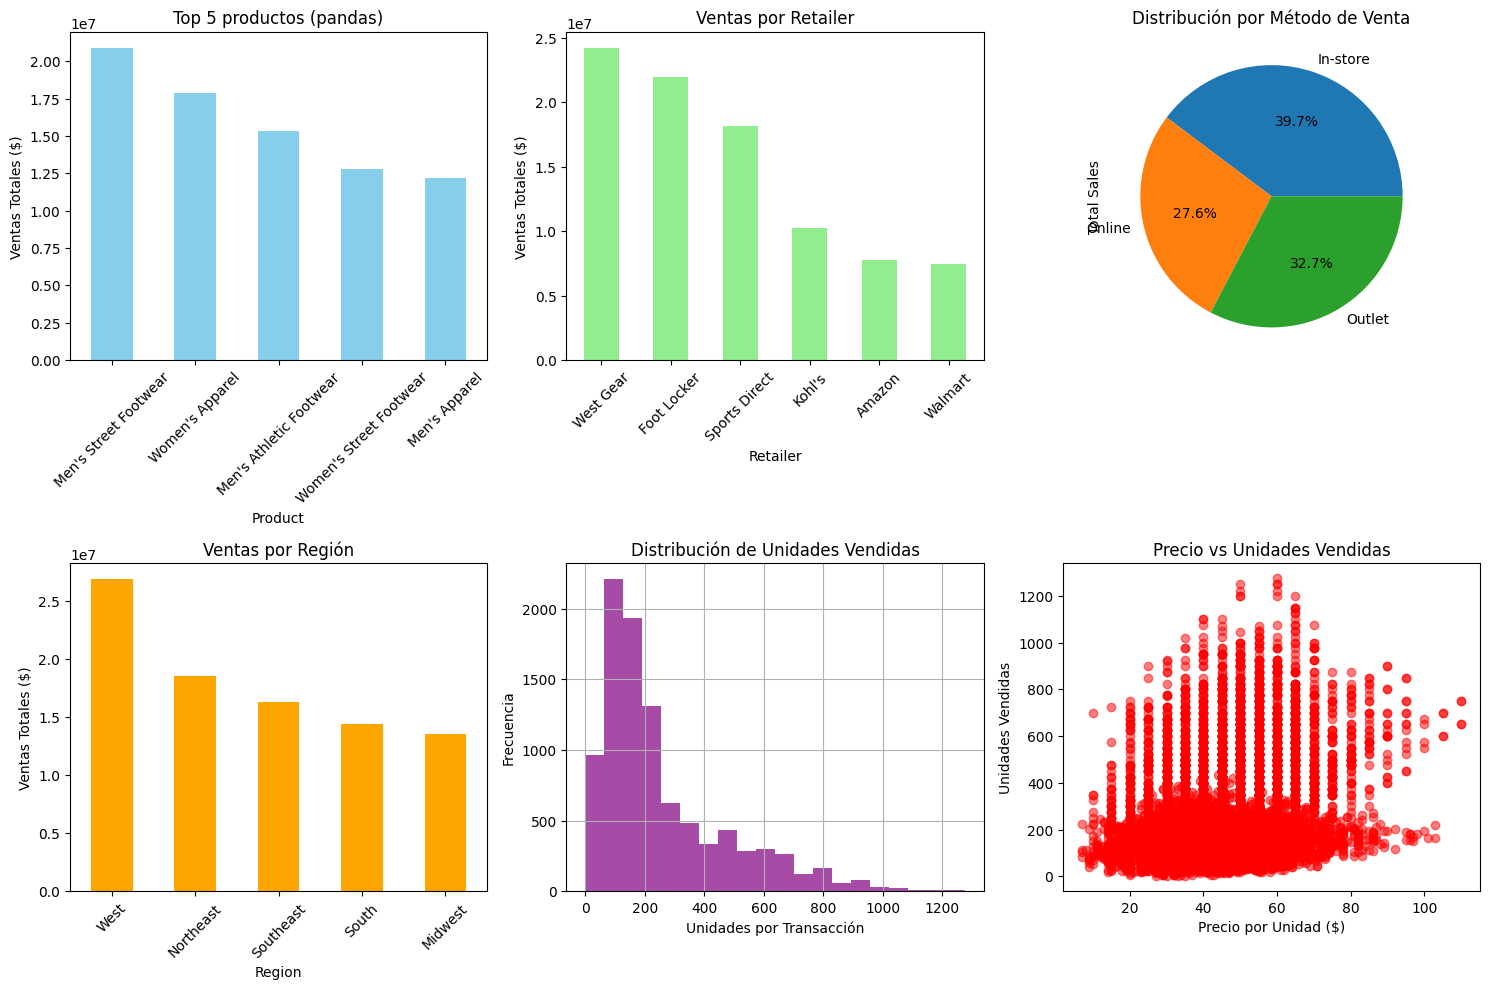


📈 Análisis temporal:


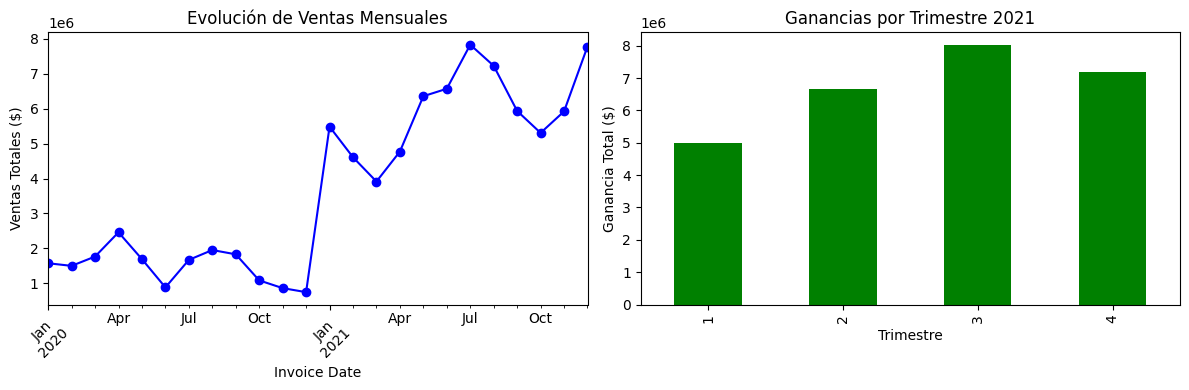

In [62]:
# Visualización integrada con pandas - datos Adidas
print("📊 Visualización con pandas:")

import matplotlib.pyplot as plt

# Comparar métodos: pandas vs manual
plt.figure(figsize=(15, 10))

# 1. Top 5 productos (pandas vs manual)
plt.subplot(2, 3, 1)
productos_top.head().plot(kind='bar', color='skyblue')
plt.title('Top 5 productos (pandas)')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# 2. Ventas por retailer
plt.subplot(2, 3, 2)
retailer_ventas = df_adidas.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
retailer_ventas.plot(kind='bar', color='lightgreen')
plt.title('Ventas por Retailer')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# 3. Ventas por método
plt.subplot(2, 3, 3)
por_metodo_simple = df_adidas.groupby('Sales Method')['Total Sales'].sum()
por_metodo_simple.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución por Método de Venta')

# 4. Ventas por región
plt.subplot(2, 3, 4)
por_region = df_adidas.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
por_region.plot(kind='bar', color='orange')
plt.title('Ventas por Región')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# 5. Distribución de unidades vendidas
plt.subplot(2, 3, 5)
df_adidas['Units Sold'].hist(bins=20, alpha=0.7, color='purple')
plt.title('Distribución de Unidades Vendidas')
plt.xlabel('Unidades por Transacción')
plt.ylabel('Frecuencia')

# 6. Relación precio vs unidades
plt.subplot(2, 3, 6)
plt.scatter(df_adidas['Price per Unit'], df_adidas['Units Sold'], alpha=0.5, color='red')
plt.title('Precio vs Unidades Vendidas')
plt.xlabel('Precio por Unidad ($)')
plt.ylabel('Unidades Vendidas')

plt.tight_layout()
plt.show()

# Análisis adicional: tendencias temporales
print("\n📈 Análisis temporal:")
plt.figure(figsize=(12, 4))

# Ventas por mes a lo largo del tiempo
plt.subplot(1, 2, 1)
ventas_mensuales = df_adidas.groupby([df_adidas['Invoice Date'].dt.to_period('M')])['Total Sales'].sum()
ventas_mensuales.plot(kind='line', marker='o', color='blue')
plt.title('Evolución de Ventas Mensuales')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# Ganancias por trimestre
plt.subplot(1, 2, 2)
if len(ventas_2021) > 0:
    ganancias_trim = ventas_2021.groupby('Trimestre')['Operating Profit'].sum()
    ganancias_trim.plot(kind='bar', color='green')
    plt.title('Ganancias por Trimestre 2021')
    plt.ylabel('Ganancia Total ($)')

plt.tight_layout()
plt.show()